In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
data= pd.read_csv('Student_score.csv')
data

#data.head(10)



,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [24]:
data.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [27]:
#check null values
data.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [28]:
#drop unnamed colm

data=data.drop('Unnamed: 0',axis=1)
data
data.head(10)


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


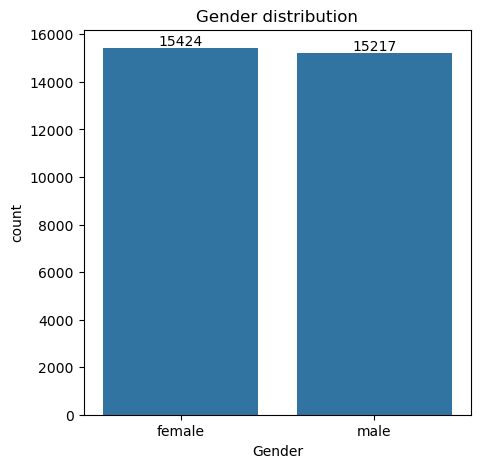

In [46]:
# gender distribution Analysis
#count plot
plt.figure(figsize= (5,5))
ax=sns.countplot(data = data,x='Gender')
ax.bar_label(ax.containers[0])
plt.title('Gender distribution')
plt.show()


# from the above chart we analysis that we have more number of femals than male

In [38]:
#to check what impact will happen of parentedu on studnt score
gp=data.groupby('ParentEduc').agg({"MathScore": 'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gp)


                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


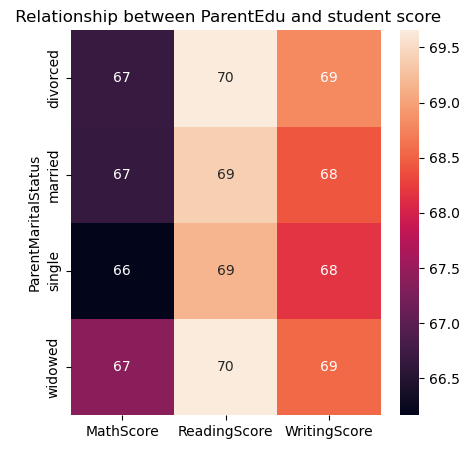

In [51]:
plt.figure(figsize=(5,5))
sns.heatmap(gp,annot=True)
plt.title(' Relationship between ParentEdu and student score')
plt.show()

# from the above chart e conclude that  the education of parents have a good impact on student score


In [44]:
# score analysis on the basis of parentmarentalstatus
gp1=data.groupby('ParentMaritalStatus').agg({"MathScore": 'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gp1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


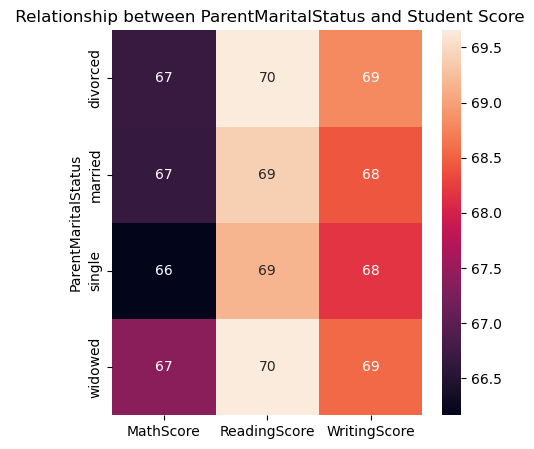

In [50]:
plt.figure(figsize=(5,5))
sns.heatmap(gp1,annot=True)
plt.title(' Relationship between ParentMaritalStatus and Student Score')
plt.show()

# from the above chart we conclude that  the maritalstatus of parents have not impact on student score

In [52]:
# analysis on the basis of practise spot
ps=data.groupby('PracticeSport').agg({"MathScore": 'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(ps)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


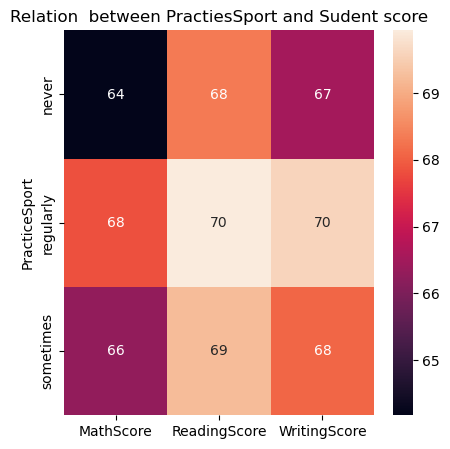

In [56]:
plt.figure(figsize=(5,5))
sns.heatmap(ps,annot=True)
plt.title("Relation  between PractiesSport and Sudent score")
plt.show()

# from above chart we conclude that there is not a impact of Prctice sport on sudent score 


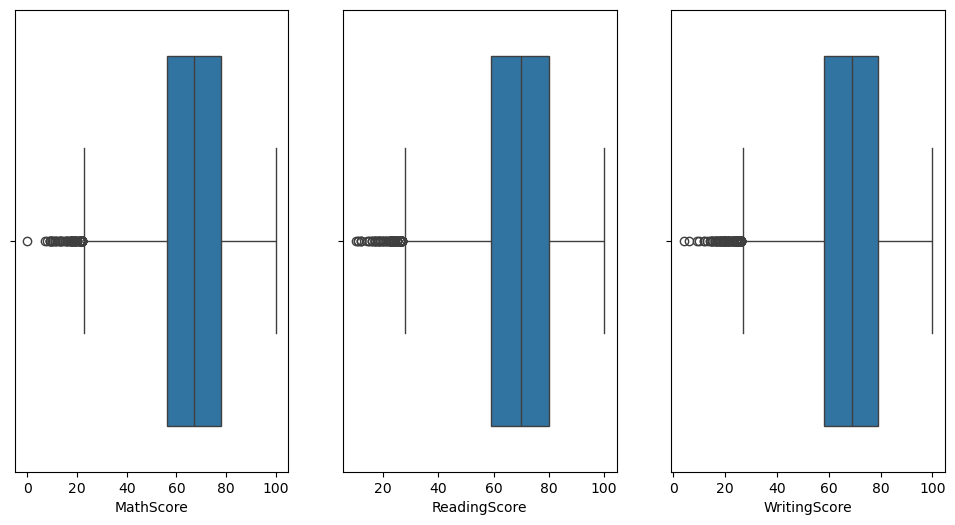

In [70]:
#box plot
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.boxplot(data=data, x='MathScore')


plt.subplot(1,3,2)
sns.boxplot(data=data, x='ReadingScore')

plt.subplot(1,3,3)
sns.boxplot(data=data, x='WritingScore')
plt.show()



# from above box plot we have conclude that math is difficult subject that reading and writing .

In [71]:
# analysis on the basis of weekly study
ps=data.groupby('WklyStudyHours').agg({"MathScore": 'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(ps)


                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


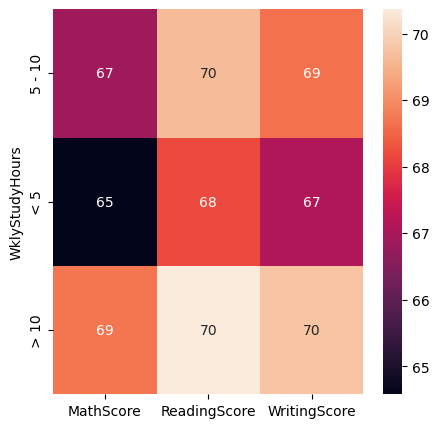

In [75]:
#graph plot
plt.figure(figsize=(5,5))
sns.heatmap(data=ps,annot = True)
plt.show()


In [ ]:
# 

In [77]:
# Analysis on the basis of ethnic group
print(data['EthnicGroup'].unique())


[nan 'group C' 'group B' 'group A' 'group D' 'group E']


In [78]:
Et=data.groupby('EthnicGroup').agg({"MathScore": 'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(Et)


             MathScore  ReadingScore  WritingScore
EthnicGroup                                       
group A      62.991888     66.787742     65.251915
group B      63.490216     67.320460     65.895125
group C      64.695723     68.438233     66.999240
group D      67.666400     70.382247     70.890844
group E      75.298936     74.251423     72.677060


In [ ]:
#plot and do analysis 


In [89]:
#seprate analysis
grpA=data.loc[(data['EthnicGroup']=='group A')].count()
print(grpA)

grpB=data.loc[(data['EthnicGroup']=='group B')].count()
print(grpB)

grpC=data.loc[(data['EthnicGroup']=='group C')].count()
print(grpC)

grpD=data.loc[(data['EthnicGroup']=='group D')].count()
print(grpD)

grpE=data.loc[(data['EthnicGroup']=='group E')].count()
print(grpE)


                                                                       

Gender                 2219
EthnicGroup            2219
ParentEduc             2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
WklyStudyHours         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64
Gender                 5826
EthnicGroup            5826
ParentEduc             5470
LunchType              5826
TestPrep               5488
ParentMaritalStatus    5605
PracticeSport          5704
IsFirstChild           5649
NrSiblings             5546
TransportMeans         5238
WklyStudyHours         5642
MathScore              5826
ReadingScore           5826
WritingScore           5826
dtype: int64
Gender                 9212
EthnicGroup            9212
ParentEduc             8652
LunchType              9212
TestPrep               8652
ParentMaritalStatus    8858
PracticeSport         

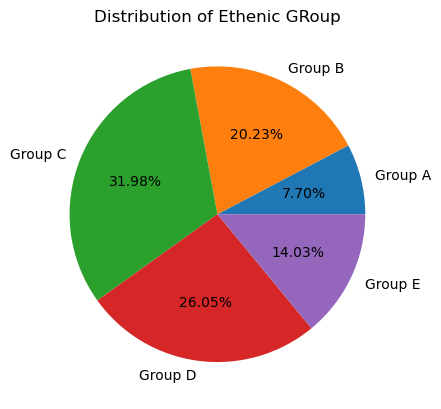

In [96]:
#plot pie chart 
l=['Group A', 'Group B', 'Group C', 'Group D','Group E']
milist=[grpA['EthnicGroup'],grpB['EthnicGroup'],grpC['EthnicGroup'],grpD['EthnicGroup'],grpE['EthnicGroup']]
plt.pie(milist,labels=l,autopct='%1.2f%%')
plt.title("Distribution of Ethenic GRoup")
plt.show()

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

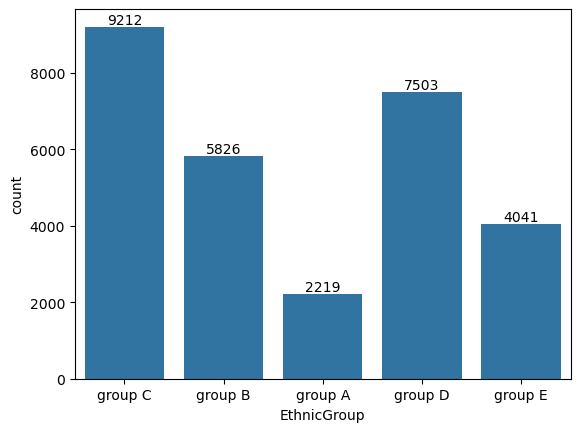

In [97]:
#count of Groups
ax=sns.countplot(data=data,x='EthnicGroup')
ax.bar_label(ax.containers[0])
